PROBLEM STATEMENT

Zaimportowane dane przedstawiają koszty leczenia w Stanach Zjednoczonych. Naszym zadaniem jest zbadanie przedstawionych danych, rozpoznanie korelacji pomiędzy poszczególnymi kategoriami oraz utworzenie modeli, które w sposób dokładny będą mogły przewidzieć koszty leczenia w zależności od danych zmiennych. Przedstawione dane pochodzą z wcześniej udostępnionej bazy danych.

DATA COLLECTION

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OrdinalEncoder
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split

%matplotlib inline

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/Kamil128/ProjektPraktycznyRegresja/main/data/medical_cost/medical_cost.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
df.head(n=10)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
5,31,female,25.740,0,no,southeast,3756.62160
6,46,female,33.440,1,no,southeast,8240.58960
7,37,female,27.740,3,no,northwest,7281.50560
8,37,male,29.830,2,no,northeast,6406.41070
9,60,female,25.840,0,no,northwest,28923.13692


In [5]:
df.tail(n=10)

,age,sex,bmi,children,smoker,region,charges
1328,23,female,24.225,2,no,northeast,22395.74424
1329,52,male,38.600,2,no,southwest,10325.20600
1330,57,female,25.740,2,no,southeast,12629.16560
1331,23,female,33.400,0,no,southwest,10795.93733
1332,52,female,44.700,3,no,southwest,11411.68500
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500
1337,61,female,29.070,0,yes,northwest,29141.36030


In [6]:
df.sample(n=10)

,age,sex,bmi,children,smoker,region,charges
164,37,male,29.640,0,no,northwest,5028.14660
459,40,female,33.000,3,no,southeast,7682.67000
1081,32,male,27.835,1,no,northwest,4454.40265
1270,26,male,33.915,1,no,northwest,3292.52985
1294,58,male,25.175,0,no,northeast,11931.12525
375,23,female,28.310,0,yes,northwest,18033.96790
563,50,male,44.770,1,no,southeast,9058.73030
770,61,male,36.100,3,no,southwest,27941.28758
859,57,male,28.100,0,no,southwest,10965.44600
221,53,female,33.250,0,no,northeast,10564.88450


In [7]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [8]:
df[['sex', 'smoker', 'region']].describe()

,sex,smoker,region
count,1338,1338,1338
unique,2,2,4
top,male,no,southeast
freq,676,1064,364


DATA CLEANING

In [9]:
# Usunięcie duplikatów
df = df.drop_duplicates()

In [10]:
# Zamienienie wartości typu object oraz int na wartości typu float
df_copy = df.copy()
ordinal_encoder = OrdinalEncoder()
df_copy[['sex', 'smoker', 'region']] = ordinal_encoder.fit_transform(df_copy[['sex', 'smoker', 'region']])
df_copy[["age", "children"]] = df_copy[["age", "children"]].astype(float)

In [11]:
# Usunięcie wartości odstających
df_copy = df_copy[df_copy['charges'] < 50000]

In [12]:
# Zaokrąglenie wartości w kolumnach "bmi" i "charges" do dwóch miejsc po przecinku
df_copy.bmi = df_copy.bmi.round(2)
df_copy.charges = df_copy.charges.round(2)

In [13]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1330 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1330 non-null   float64
 1   sex       1330 non-null   float64
 2   bmi       1330 non-null   float64
 3   children  1330 non-null   float64
 4   smoker    1330 non-null   float64
 5   region    1330 non-null   float64
 6   charges   1330 non-null   float64
dtypes: float64(7)
memory usage: 83.1 KB


EXPLORATORY DATA ANALYSYS

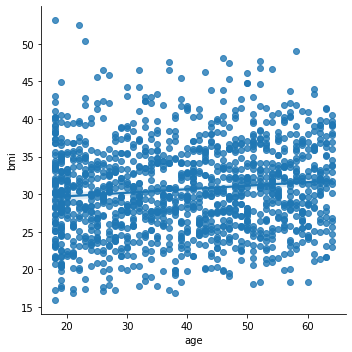

In [14]:
#Regresja między wartościami "age" i "bmi"
sns.lmplot(x='age', y='bmi', data=df_copy)

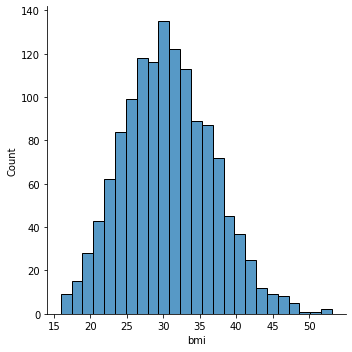

In [15]:
# Wykres przedstawiający rozkład wartości "bmi"
sns.displot(df.bmi)

FEATURE ENGINEERING

<AxesSubplot:>

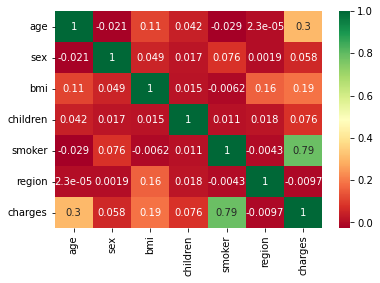

In [16]:
# Liczenie korelacji między zmiennymi
count_corr=df_copy.corr()

# Heatmapa korelacji między zmiennymi
sns.heatmap(count_corr, cmap= 'RdYlGn',annot=True)

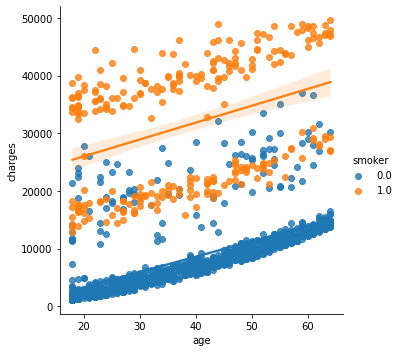

In [17]:
# Regresja między wartościami "age" i "charges" wraz z wykazanim zależności od wartości "smoker"
sns.lmplot(x='age', y='charges', data=df_copy, hue='smoker')

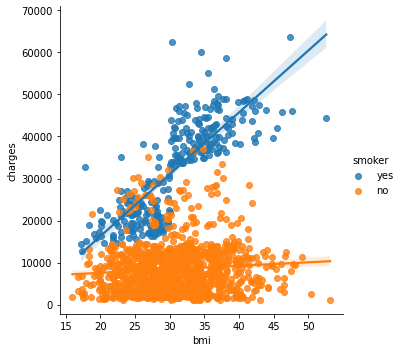

In [18]:
# Regresja między wartościami "bmi" i "charges" wraz z wykazanim zależności od wartości "smoker"
sns.lmplot(x='bmi', y='charges', data=df, hue='smoker')

<AxesSubplot:xlabel='sex', ylabel='charges'>

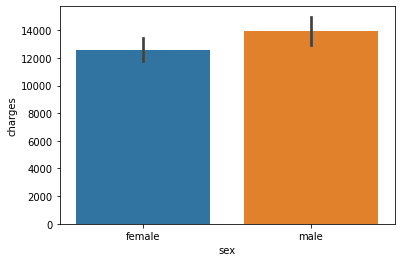

In [19]:
# Wykres słupkowy przedstawia odchylenie standardowe wartości "sex"
sns.barplot(x='sex', y='charges', data=df)

MODELLING

In [20]:
# Stworzenie zbioru testowego i treningowego
X = df_copy.iloc[:, :-1].values
y = df_copy['charges'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [21]:
# Model regresji liniowej
slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

MSE_lr_train = mean_squared_error(y_train, y_train_pred)
MSE_lr_test = mean_squared_error(y_test, y_test_pred)
r2_lr_train = r2_score(y_train, y_train_pred)
r2_lr_test = r2_score(y_test, y_test_pred)


In [22]:
# Model drzewa decyzyjnego
tree_reg = DecisionTreeRegressor(max_depth=4, random_state=42)
tree_reg.fit(X_train, y_train)
y_train_pred = tree_reg.predict(X_train)
y_test_pred = tree_reg.predict(X_test)

MSE_t_train = mean_squared_error(y_train, y_train_pred)
MSE_t_test = mean_squared_error(y_test, y_test_pred)
r2_t_train = r2_score(y_train, y_train_pred)
r2_t_test = r2_score(y_test, y_test_pred)



In [23]:
# Wyniki zastosowanych modeli
wyniki = pd.DataFrame({'MSE train':[MSE_lr_train.round(0), MSE_t_train.round(0)],
                      'MSE test':[MSE_lr_test.round(0), MSE_t_test.round(0)],
                      'R^2 train':[r2_lr_train, r2_t_train],
                      'R^2 test':[r2_lr_test, r2_t_test]})
wyniki.index=['Linear Regression', 'Decision Tree']
wyniki

,MSE train,MSE test,R^2 train,R^2 test
Linear Regression,33864002.0,34050795.0,0.750217,0.759014
Decision Tree,17811366.0,22435679.0,0.868622,0.841217


In [24]:
# Stworzenie zbioru testowego i treningowego
X = df_copy[['age', 'bmi', 'smoker']].values
y = df_copy['charges'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [25]:
# Model regresji liniowej
slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

MSE_lr_train = mean_squared_error(y_train, y_train_pred)
MSE_lr_test = mean_squared_error(y_test, y_test_pred)
r2_lr_train = r2_score(y_train, y_train_pred)
r2_lr_test = r2_score(y_test, y_test_pred)

In [26]:
# Model drzewa decyzyjnego
tree_reg = DecisionTreeRegressor(max_depth=4, random_state=42)
tree_reg.fit(X_train, y_train)
y_train_pred = tree_reg.predict(X_train)
y_test_pred = tree_reg.predict(X_test)

MSE_t_train = mean_squared_error(y_train, y_train_pred)
MSE_t_test = mean_squared_error(y_test, y_test_pred)
r2_t_train = r2_score(y_train, y_train_pred)
r2_t_test = r2_score(y_test, y_test_pred)

In [27]:
# Wyniki zastosowanych modeli
wyniki = pd.DataFrame({'MSE train':[MSE_lr_train.round(0), MSE_t_train.round(0)],
                      'MSE test':[MSE_lr_test.round(0), MSE_t_test.round(0)],
                      'R^2 train':[r2_lr_train, r2_t_train],
                      'R^2 test':[r2_lr_test, r2_t_test]})
wyniki.index=['Linear Regression', 'Decision Tree']
wyniki

,MSE train,MSE test,R^2 train,R^2 test
Linear Regression,34275195.0,34884443.0,0.747184,0.753114
Decision Tree,18284186.0,21756702.0,0.865135,0.846023


In [28]:
# Stworzenie zbioru testowego i treningowego
X = df_copy[['smoker']].values
y = df_copy['charges'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=0)

In [29]:
# Model regresji liniowej
slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

MSE_lr_train = mean_squared_error(y_train, y_train_pred)
MSE_lr_test = mean_squared_error(y_test, y_test_pred)
r2_lr_train = r2_score(y_train, y_train_pred)
r2_lr_test = r2_score(y_test, y_test_pred)

In [30]:
# Model drzewa decyzyjnego
tree_reg = DecisionTreeRegressor(max_depth=4, random_state=42)
tree_reg.fit(X_train, y_train)
y_train_pred = tree_reg.predict(X_train)
y_test_pred = tree_reg.predict(X_test)

MSE_t_train = mean_squared_error(y_train, y_train_pred)
MSE_t_test = mean_squared_error(y_test, y_test_pred)
r2_t_train = r2_score(y_train, y_train_pred)
r2_t_test = r2_score(y_test, y_test_pred)

In [31]:
# Wyniki zastosowanych modeli
wyniki = pd.DataFrame({'MSE train':[MSE_lr_train.round(0), MSE_t_train.round(0)],
                      'MSE test':[MSE_lr_test.round(0), MSE_t_test.round(0)],
                      'R^2 train':[r2_lr_train, r2_t_train],
                      'R^2 test':[r2_lr_test, r2_t_test]})
wyniki.index=['Linear Regression', 'Decision Tree']
wyniki

,MSE train,MSE test,R^2 train,R^2 test
Linear Regression,51237700.0,57001504.0,0.622068,0.596587
Decision Tree,51237700.0,57001504.0,0.622068,0.596587


In [32]:
# Kroswalidacja zastosowanych modeli
from sklearn.model_selection import KFold
X = df_copy[["age","bmi", "smoker"]]
y = df_copy["charges"]
cv = KFold(n_splits=5, shuffle=True, random_state=42)
for train, test in cv.split(X, y):
    X_train, y_train = X.iloc[train], y.iloc[train]
    X_test, y_test = X.iloc[test], y.iloc[test]

# Model regresji liniowej
slr = LinearRegression()

slr.fit(X_train, y_train)
y_train_pred = slr.predict(X_train)
y_test_pred = slr.predict(X_test)

MSE_lr_train = mean_squared_error(y_train, y_train_pred)
MSE_lr_test = mean_squared_error(y_test, y_test_pred)
r2_lr_train = r2_score(y_train, y_train_pred)
r2_lr_test = r2_score(y_test, y_test_pred)

# Model drzewa decyzyjnego
tree_reg = DecisionTreeRegressor(max_depth=4, random_state=42)
tree_reg.fit(X_train, y_train)
y_train_pred = tree_reg.predict(X_train)
y_test_pred = tree_reg.predict(X_test)

MSE_t_train = mean_squared_error(y_train, y_train_pred)
MSE_t_test = mean_squared_error(y_test, y_test_pred)
r2_t_train = r2_score(y_train, y_train_pred)
r2_t_test = r2_score(y_test, y_test_pred)

In [33]:
#Wyniki  modeli
wyniki = pd.DataFrame({'MSE train':[MSE_lr_train.round(0), MSE_t_train.round(0)],
                      'MSE test':[MSE_lr_test.round(0), MSE_t_test.round(0)],
                      'R^2 train':[r2_lr_train, r2_t_train],
                      'R^2 test':[r2_lr_test, r2_t_test]})
wyniki.index=['Linear Regression', 'Decision Tree']
wyniki

,MSE train,MSE test,R^2 train,R^2 test
Linear Regression,34317542.0,34863404.0,0.752447,0.730443
Decision Tree,18419322.0,19441113.0,0.867131,0.849685
